<h1>Algoritmos Voraces en Grafos</h1>

Dado un grafo ponderado $(G , w )$ donde $G = (V , E )$ y $w : E  \mapsto \mathbb R$, un
arbol de expansión mı́nima es un arbol de expansión en el que la suma
de los pesos w de las aristas es mı́nima.

<h2>Algoritmo Prim</h2>

El algoritmo de Prim construye un arbol visitando vértices de
manera iterativa hasta que se obtiene un árbol de expansión mı́nima.Se comienza desde un vértice cualquiera y en cada iteración se agrega la arista que tenga el mı́nimo peso y no complete un ciclo.
La complejidad computacional del algoritmo de Prim es $O(V \operatorname{log} V)$.
El siguiente pseudo-código implementa el algoritmo mediante una cola de prioridad:



<h2>Algoritmo Kruskal</h2>

El algoritmo de Kruskal construye un arbol visitando aristas de
manera iterativa hasta que se obtiene un árbol de expansión mı́nima.
Se comienza desde un vértice cualquiera y en cada iteración se
agrega la arista que tenga el mı́nimo peso y no complete un ciclo.
La complejidad computacional del algoritmo de Kruskal es $O(E \operatorname{log} E)$.




In [1]:
import numpy as np
from heapq import heappush,heappop

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass

    
class simple_graph(abstract_graph):
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}
    

    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}
        
    def adjacency_matrix(self):
        n=len(self.nodes)
        mat=np.zeros((n,n))
        adjacent=lambda x : [1 if x==v else 0 for (u,v) in enumerate(sorted(list(G.nodes))) ]
        L=self.adjacency_list()
        i=0
        for v in sorted(list(G.nodes)):
            for l in L[v]:
                mat[i,]+=adjacent(l)
            i=i+1
        return mat
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges.keys() if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

class weighted_digraph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}
        
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges.keys() if u==n } 
        return {v:adjacent(v) for v in self.nodes}    
    


In [2]:
import heapq

h = []
heappush(h, (5, 'escribir codigo'))
heappush(h, (7, 'pasar a produccion'))
heappush(h, (1, 'escribir requerimientos'))
heappush(h, (3, 'crear tests'))
while h:
    i,v=heappop(h)
    print('Tarea : {0}, Prioridad {1}'.format(v,i))

Tarea : escribir requerimientos, Prioridad 1
Tarea : crear tests, Prioridad 3
Tarea : escribir codigo, Prioridad 5
Tarea : pasar a produccion, Prioridad 7


In [3]:
def prim_mst(graph,start):
    frontier, visited = [], set()
    tree=[]
    heappush(frontier, (0, (None,start)))
    adjacency=graph.adjacency_list()
    while frontier:
        weight,(u,v)=heappop(frontier)
        if v in visited:
            continue
        print('Vertice padre: {0}, Prioridad {1}'.format(v,weight))
        visited.update({v})
        tree.append((u,v,{'weight':weight}))
        for neighbor in adjacency[v]:
            #print('Vertice vecino : {0}'.format(neighbor))
            if neighbor not in visited:
                if (v,neighbor) in graph.edges:
                    new_edge=(v,neighbor)
                else:
                    new_edge=(neighbor,v)
                heappush(frontier, (graph.edges[new_edge], (v,neighbor)))
    return tree

In [4]:
def naive_find(C, u):
    while C[u] != u:
        u = C[u]
    return u

def naive_union(C, u, v):
    u = naive_find(C, u)
    v = naive_find(C, v)
    C[u] = v

def naive_kruskal(G):
    E = G.edges
    tree=[]
    C = {u:u for u in G.nodes}
    for (u,v),weight in sorted(E.items(),key=lambda x: x[1]):
        print('Vertice : ({0},{1}), Prioridad {2}'.format(u,v,weight))
        if naive_find(C, u) != naive_find(C, v):
            tree.append((u,v,{'weight':weight}))
            naive_union(C, u, v)
    return T

In [79]:
def find(C, u): 
    if C[u] != u:
        C[u] = find(C, C[u])
    return C[u]

def union(C, R, u, v):
    u, v = find(C, u), find(C, v)
    if R[u] > R[v]:
        C[v] = u 
    else:
        C[u] = v
    if R[u] == R[v]:
        R[v] += 1
        
def kruskal(G):
    E = G.edges
    tree=[]
    C,R = {u:u for u in G.nodes}, {u:0 for u in G.nodes} 
    for (u,v),weight in sorted(E.items(),key=lambda x: x[1]):
        if find(C, u) != find(C, v): 
            T.add((u, v))
            union(C, R, u, v)
    return T

In [5]:
import numpy as np

E={('a','b'):4,('b','c'):7,('b','d'):8,('c','d'):10,('a','c'):9}
G=weighted_graph(E)
print('aristas : ',G.edges)


aristas :  {('a', 'b'): 4, ('b', 'c'): 7, ('b', 'd'): 8, ('c', 'd'): 10, ('a', 'c'): 9}


In [6]:
G.adjacency_list()

{'d': {'b', 'c'}, 'b': {'a', 'c', 'd'}, 'c': {'a', 'b', 'd'}, 'a': {'b', 'c'}}

In [7]:
T=prim_mst(G,'a')

Vertice padre: a, Prioridad 0
Vertice padre: b, Prioridad 4
Vertice padre: c, Prioridad 7
Vertice padre: d, Prioridad 8


In [9]:
T

[(None, 'a', {'weight': 0}),
 ('a', 'b', {'weight': 4}),
 ('b', 'c', {'weight': 7}),
 ('b', 'd', {'weight': 8})]

In [10]:
T_kruskal=naive_kruskal(G)

Vertice : (a,b), Prioridad 4
Vertice : (b,c), Prioridad 7
Vertice : (b,d), Prioridad 8
Vertice : (a,c), Prioridad 9
Vertice : (c,d), Prioridad 10


In [11]:
tree_weight = lambda T: np.sum([k['weight'] for (u,v,k) in T])

In [12]:
print('El costo del arbol recubridor Prim es : {}'.format(tree_weight(T)))

El costo del arbol recubridor Prim es : 19


In [13]:
print('El costo del arbol recubridor Kruskal es : {}'.format(tree_weight(T_kruskal)))

El costo del arbol recubridor Kruskal es : 19


In [14]:
E={('a','b'):4,('a','h'):8,('b','h'):11,
   ('b','c'):8,('h','i'):7,('c','i'):2,('i','g'):6,
  ('h','g'):1,('g','f'):2,('c','f'):4,('c','d'):7,
  ('d','e'):9,('d','f'):14,('f','e'):9}
G=weighted_graph(E)

In [15]:
T=prim_mst(G,'a')

Vertice padre: a, Prioridad 0
Vertice padre: b, Prioridad 4
Vertice padre: h, Prioridad 8
Vertice padre: g, Prioridad 1
Vertice padre: f, Prioridad 2
Vertice padre: c, Prioridad 4
Vertice padre: i, Prioridad 2
Vertice padre: d, Prioridad 7
Vertice padre: e, Prioridad 9


In [16]:
T

[(None, 'a', {'weight': 0}),
 ('a', 'b', {'weight': 4}),
 ('a', 'h', {'weight': 8}),
 ('h', 'g', {'weight': 1}),
 ('g', 'f', {'weight': 2}),
 ('f', 'c', {'weight': 4}),
 ('c', 'i', {'weight': 2}),
 ('c', 'd', {'weight': 7}),
 ('d', 'e', {'weight': 9})]

In [17]:
print('El costo del arbol recubridor Prim es : {}'.format(tree_weight(T)))

El costo del arbol recubridor Prim es : 37


In [19]:
T_kruskal=naive_kruskal(G)
print('El costo del arbol recubridor Kruskal es : {}'.format(tree_weight(T_kruskal)))

Vertice : (h,g), Prioridad 1
Vertice : (c,i), Prioridad 2
Vertice : (g,f), Prioridad 2
Vertice : (a,b), Prioridad 4
Vertice : (c,f), Prioridad 4
Vertice : (i,g), Prioridad 6
Vertice : (h,i), Prioridad 7
Vertice : (c,d), Prioridad 7
Vertice : (a,h), Prioridad 8
Vertice : (b,c), Prioridad 8
Vertice : (d,e), Prioridad 9
Vertice : (f,e), Prioridad 9
Vertice : (b,h), Prioridad 11
Vertice : (d,f), Prioridad 14
El costo del arbol recubridor Kruskal es : 37


In [20]:
import networkx as nx

G_nx = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G_nx.add_weighted_edges_from([(u,v,w) for ((u,v),w) in E.items()])

In [21]:
T_nx = nx.minimum_spanning_tree(G_nx)

In [23]:
sorted(T_nx.edges(data=True))

[('a', 'b', {'weight': 4}),
 ('a', 'h', {'weight': 8}),
 ('c', 'd', {'weight': 7}),
 ('c', 'f', {'weight': 4}),
 ('c', 'i', {'weight': 2}),
 ('f', 'e', {'weight': 9}),
 ('g', 'f', {'weight': 2}),
 ('h', 'g', {'weight': 1})]

In [25]:
print('El costo del arbol recubridor Prim es : {}'.format(tree_weight(T)))

El costo del arbol recubridor Prim es : 37


In [27]:
print('El costo del arbol recubridor Kruskal es : {}'.format(tree_weight(T_kruskal)))

El costo del arbol recubridor Kruskal es : 37


# Grafos Aleatorios 

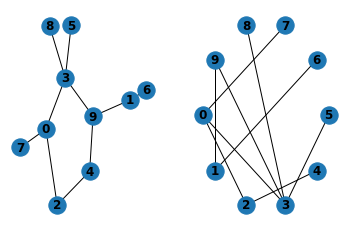

In [61]:
import matplotlib.pyplot as plt

plt.Figure((8,15))
while True:
    G_nx = nx.erdos_renyi_graph(10, 0.25,directed=False)
    if(nx.is_connected(G_nx)):
        weights={edge:np.random.randint(1,10) for edge in G_nx.edges}
        nx.set_edge_attributes(G_nx, values = weights, name = 'weight')
        T_nx = nx.minimum_spanning_tree(G_nx)
        subax1 = plt.subplot(121)
        nx.draw(G_nx, with_labels=True, font_weight='bold')
        subax2 = plt.subplot(122)
        nx.draw_shell(T_nx, with_labels=True, font_weight='bold')
        break
        
print()

In [74]:
cost=np.sum([k['weight'] for (u,v,k) in T_nx.edges(data=True)])
print('El costo del MST de grafo aleatorio es : {}'.format(cost))

El costo del MST de grafo aleatorio es : 35


In [66]:
E={(u,v):k['weight'] for (u,v,k) in G_nx.edges(data=True)}

In [76]:
G=weighted_graph(E)
T=prim_mst(G,1)
print('El costo del arbol recubridor Prim es : {}'.format(tree_weight(T)))

Vertice padre: 1, Prioridad 0
Vertice padre: 9, Prioridad 2
Vertice padre: 3, Prioridad 4
Vertice padre: 8, Prioridad 4
Vertice padre: 0, Prioridad 5
Vertice padre: 2, Prioridad 2
Vertice padre: 4, Prioridad 1
Vertice padre: 7, Prioridad 3
Vertice padre: 5, Prioridad 6
Vertice padre: 6, Prioridad 8
El costo del arbol recubridor Prim es : 35


In [78]:
T=naive_kruskal(G)
print('El costo del arbol recubridor Kruskal es : {}'.format(tree_weight(T)))

Vertice : (2,4), Prioridad 1
Vertice : (0,2), Prioridad 2
Vertice : (1,9), Prioridad 2
Vertice : (0,7), Prioridad 3
Vertice : (3,8), Prioridad 4
Vertice : (3,9), Prioridad 4
Vertice : (0,3), Prioridad 5
Vertice : (3,5), Prioridad 6
Vertice : (4,9), Prioridad 6
Vertice : (1,6), Prioridad 8
El costo del arbol recubridor Kruskal es : 35


<h2>Ejercicio</h2>

Se desea construir un acueducto que una las ciudades de la region del Maule. El costo en distancia se encuentra en mm en un archivo csv.

In [85]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/sherna90/matematicas_discretas/master/data/distancias_maule.csv', encoding = 'utf-8',dtype={'WKT':str,'InputID':str,'TargetID':str,'Distance':float}) 

df.loc[df['InputID']=='TALCA'].head()

,WKT,InputID,TargetID,Distance
0,"MULTIPOINT ((-71.661999 -35.432349),(-71.59687...",TALCA,PANGUILEMO,9402.992976
1,"MULTIPOINT ((-71.661999 -35.432349),(-71.56431...",TALCA,HUILQUILEMU,9026.792210
2,"MULTIPOINT ((-72.412391 -35.335426),(-71.66199...",TALCA,CONSTITUCION,69023.063640
3,"MULTIPOINT ((-72.333641 -35.427048),(-71.66199...",TALCA,SANTA OLGA,60993.437978
4,"MULTIPOINT ((-72.494926 -35.469452),(-71.66199...",TALCA,LOS PELLINES,75728.660537


In [87]:
df['WKT'] = df['WKT'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['InputID'] = df['InputID'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['TargetID'] = df['TargetID'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['InputID'].unique()

array(['TALCA', 'PANGUILEMO', 'HUILQUILEMU', 'CONSTITUCION', 'SANTA OLGA',
       'LOS PELLINES', 'CUREPTO', 'EMPEDRADO', 'MAULE', 'CULENAR',
       'VILLA FRANCIA', 'CHACARILLAS', 'PELARCO', 'PENCAHUE', 'CUMPEO',
       'SAN CLEMENTE', 'SAN RAFAEL', 'CAUQUENES', 'CHANCO', 'PELLUHUE',
       'QUILICURA', 'CURICO', 'SARMIENTO', 'VILLA LOS NICHES',
       'SAN ALBERTO', 'HUALAE', 'LICANTEN', 'ILOCA', 'MOLINA',
       'ITAHUE UNO', 'RAUCO', 'ROMERAL', 'SAGRADA  FAMILIA', 'VILLA PRAT',
       'TENO', 'LLICO', 'LAGO VICHUQUEN', 'LINARES', 'VARA GRUESA',
       'LAS OBRAS', 'COLBUN', 'PANIMAVIDA', 'LONGAVI', 'PARRAL', 'RETIRO',
       'COPIHUE', 'SAN JAVIER', 'BOBADILLA', 'VILLA ALEGRE',
       'YERBAS BUENAS'], dtype=object)

In [88]:
E={}
for index, row in df.iterrows():
    E.update({(str(row['InputID']), str(row['TargetID'])):row['Distance']/1000})

In [89]:
G=weighted_graph(E)

In [90]:
print(G.nodes)

{'SAN JAVIER', 'SAN RAFAEL', 'BOBADILLA', 'LONGAVI', 'CURICO', 'LICANTEN', 'CUMPEO', 'CUREPTO', 'CULENAR', 'MAULE', 'COLBUN', 'PARRAL', 'SAN CLEMENTE', 'LAS OBRAS', 'YERBAS BUENAS', 'QUILICURA', 'CHANCO', 'COPIHUE', 'EMPEDRADO', 'LINARES', 'TALCA', 'VILLA FRANCIA', 'PELLUHUE', 'VARA GRUESA', 'TENO', 'SAN ALBERTO', 'HUILQUILEMU', 'SANTA OLGA', 'LLICO', 'RETIRO', 'SARMIENTO', 'PENCAHUE', 'CAUQUENES', 'ITAHUE UNO', 'ROMERAL', 'VILLA PRAT', 'PANIMAVIDA', 'PANGUILEMO', 'CHACARILLAS', 'LOS PELLINES', 'SAGRADA  FAMILIA', 'RAUCO', 'MOLINA', 'ILOCA', 'LAGO VICHUQUEN', 'PELARCO', 'CONSTITUCION', 'HUALAE', 'VILLA ALEGRE', 'VILLA LOS NICHES'}


In [91]:
T=prim_mst(G,'TALCA')

Vertice padre: TALCA, Prioridad 0
Vertice padre: CULENAR, Prioridad 3.9649338381316803
Vertice padre: VILLA FRANCIA, Prioridad 1.33428335842812
Vertice padre: CHACARILLAS, Prioridad 4.46585695446726
Vertice padre: MAULE, Prioridad 2.5950385329768
Vertice padre: BOBADILLA, Prioridad 4.465889689069121
Vertice padre: SAN JAVIER, Prioridad 4.59017254506704
Vertice padre: HUILQUILEMU, Prioridad 9.026792209591079
Vertice padre: VILLA ALEGRE, Prioridad 9.18977588004314
Vertice padre: PANGUILEMO, Prioridad 9.40299297647628
Vertice padre: SAN RAFAEL, Prioridad 9.18076991683921
Vertice padre: PELARCO, Prioridad 10.7754701402999
Vertice padre: PENCAHUE, Prioridad 11.4378358826853
Vertice padre: SAN CLEMENTE, Prioridad 11.8953735732226
Vertice padre: YERBAS BUENAS, Prioridad 16.4468074244873
Vertice padre: LINARES, Prioridad 10.7962798998361
Vertice padre: VARA GRUESA, Prioridad 8.408269680843619
Vertice padre: LAS OBRAS, Prioridad 8.48362388917583
Vertice padre: PANIMAVIDA, Prioridad 10.719326937

In [92]:
cost=np.sum([d['weight'] for (u,v,d) in T])
print('El costo del arbol recubridor es : {}'.format(cost))

El costo del arbol recubridor es : 588.4666947699772
